# Cleaning transactions 2020

In [48]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib as mpl 
import utils
from scipy.stats import zscore
from scipy import stats 

In [2]:
df = pd.read_csv('transactions-2020-utf8.csv', encoding='UTF-8', sep = '\t')

In [3]:
#pd.set_option('display.max_columns', None)

In [4]:
df.head()

,Date,Time,Time Zone,Gross Sales,Discounts,Net Sales,Gift Card Sales,Tax,Tip,Partial Refunds,Total Collected,Source,Card,Card Entry Methods,Cash,Square Gift Card,Other Tender,Other Tender Type,Other Tender Note,Fees,Net Total,Transaction ID,Payment ID,Card Brand,PAN Suffix,Device Name,Staff Name,Staff ID,Details,Description,Event Type,Location,Dining Option,Customer ID,Customer Name,Customer Reference ID,Device Nickname,Deposit ID,Deposit Date,Deposit Details,Fee Percentage Rate,Fee Fixed Rate,Refund Reason,E-money,Discount Name,Transaction Status
0,02/29/20,16:52:04,Tokyo,¥742,¥0,¥742,¥0,¥59,¥0,¥0,¥801,Point of Sale,¥801,Dipped,¥0,¥0,¥0,NaN,NaN,¥-26,¥775,dLIMgMeX35IR7jt0YarvSp9eV,9mk8SMZmjPQ52tdLqblIDFoQvaB,Visa,9018.0,Sweet Co. Nawate III,NaN,NaN,https://squareup.com/dashboard/sales/transacti...,"フランス食パン (斤), 明太フランス (ハーフ), ショコラフランボワーズ, 2 x 寒天...",Payment,NT,持ち帰り,NaN,NaN,NaN,Nawate Cafe 3,3ZFJ7M38AYNC8YN188BY12E74TQH,03/05/20,https://squareup.com/dashboard/sales/deposits/...,3.25,¥0,NaN,¥0,NaN,Complete
1,02/29/20,16:51:05,Tokyo,¥485,¥0,¥485,¥0,¥38,¥0,¥0,¥523,Point of Sale,¥523,Swiped,¥0,¥0,¥0,NaN,NaN,¥-17,¥506,lhnzIN6rN3VYgcxp8HQ4n6reV,Ng9mjUdBRs7ZdlUzlQy9LEgHvaB,Visa,8094.0,Sweet Co. Nawate I,NaN,NaN,https://squareup.com/dashboard/sales/transacti...,"ヴァリエ (ハーフ), くるみぱん",Payment,NT,持ち帰り,NaN,NaN,NaN,Nawate Cafe 1,3ZFJ7M38AYNC8YN188BY12E74TQH,03/05/20,https://squareup.com/dashboard/sales/deposits/...,3.25,¥0,NaN,¥0,NaN,Complete
2,02/29/20,16:45:36,Tokyo,¥276,¥0,¥276,¥0,¥22,¥0,¥0,¥298,Point of Sale,¥0,NaN,¥298,¥0,¥0,NaN,NaN,¥0,¥298,V5pObKacaVgWK9qeCbdVh2ieV,hPpwGeI3hdpRNSpw7UoRKQB,NaN,NaN,Sweet Co. Nawate I,NaN,NaN,https://squareup.com/dashboard/sales/transacti...,バゲット (本),Payment,NT,持ち帰り,NaN,NaN,NaN,Nawate Cafe 1,NaN,NaN,NaN,NaN,NaN,NaN,¥0,NaN,Complete
3,02/29/20,16:37:51,Tokyo,"¥1,038",¥0,"¥1,038",¥0,¥83,¥0,¥0,"¥1,121",Point of Sale,¥0,NaN,"¥1,121",¥0,¥0,NaN,NaN,¥0,"¥1,121",7EnlKEFMC9VpN7vV3ClVFMAfV,fYApAlAGKJXbZM7R3n7wJQB,NaN,NaN,Sweet Co. Nawate I,NaN,NaN,https://squareup.com/dashboard/sales/transacti...,"フランス食パン (斤), マカダミアチョコフランス, ゴルゴンゾーラスティック, チーズフォ...",Payment,NT,持ち帰り,NaN,NaN,NaN,Nawate Cafe 1,NaN,NaN,NaN,NaN,NaN,NaN,¥0,NaN,Complete
4,02/29/20,16:34:01,Tokyo,"¥1,104",¥0,"¥1,104",¥0,¥88,¥0,¥0,"¥1,192",Point of Sale,¥0,NaN,"¥1,192",¥0,¥0,NaN,NaN,¥0,"¥1,192",rMnRULCPi70n8TpBpuT9sx2eV,jayS4HLAabcfKWyeNXDTKQB,NaN,NaN,Sweet Co. Nawate I,NaN,NaN,https://squareup.com/dashboard/sales/transacti...,"プレミアムショコララウンド (ハーフ), スイートの食パン (斤), 3 x ハードベーグル...",Payment,NT,持ち帰り,NaN,NaN,NaN,Nawate Cafe 1,NaN,NaN,NaN,NaN,NaN,NaN,¥0,NaN,Complete


In [5]:
df = df[['Date', 'Time', 'Total Collected']]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8274 entries, 0 to 8273
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             8274 non-null   object
 1   Time             8274 non-null   object
 2   Total Collected  8274 non-null   object
dtypes: object(3)
memory usage: 194.0+ KB


In [7]:
# Cleaning Date
df.Date=pd.to_datetime(df.Date)

In [8]:
#df['Time'] =  pd.to_datetime(df['Time'], format='%H:%M:%S')

In [9]:
# Cleaning Time
df['Time'] = pd.to_timedelta(df['Time'], unit='s')

In [12]:
# Cleaning Total Collected
df['Total Collected'] = df['Total Collected'].str.replace('¥', '')
df['Total Collected'] = df['Total Collected'].str.replace(',', '')
df['Total Collected'] = df['Total Collected'].astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8274 entries, 0 to 8273
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   Date             8274 non-null   datetime64[ns] 
 1   Time             8274 non-null   timedelta64[ns]
 2   Total Collected  8274 non-null   int64          
dtypes: datetime64[ns](1), int64(1), timedelta64[ns](1)
memory usage: 194.0 KB


In [19]:
df.head()

,Date,Time,Total Collected
0,2020-02-29,16:52:04,801
1,2020-02-29,16:51:05,523
2,2020-02-29,16:45:36,298
3,2020-02-29,16:37:51,1121
4,2020-02-29,16:34:01,1192


In [16]:
# To delete returns 
df=df.drop(df[df['Total Collected'] < 0].index)

In [22]:
# Renaming
df.rename(columns={'Total Collected':'Total'}, inplace=True)

<Figure size 576x576 with 0 Axes>

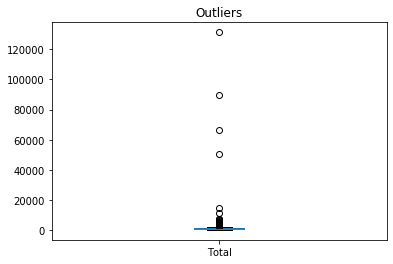

In [42]:
# Ploting outliers
plt.figure(figsize=(8,8))
df.plot.box()
plt.title('Outliers')
plt.show();

In [49]:
#Removing outliers
z_scores = stats.zscore(df)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df2 = df[filtered_entries]



TypeError: unsupported operand type(s) for /: 'Timestamp' and 'int'

In [23]:
df_20=df.groupby(['Date']).sum()

In [25]:
df_20.head()

,Total
Date,
2020-01-02,497304
2020-01-03,362931
2020-01-04,296683
2020-01-05,224969
2020-01-06,120328


In [26]:
df_20.to_csv('2020_prophet.csv')